<a href="https://colab.research.google.com/github/marciogsantana/engenharia_machine_learning/blob/main/C%C3%B3pia_de_%5BIGTI%5D_MPT_S%C3%A9ries_Temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IGTI - MPT**

- Séries temporais
- [Prof. Matheus Mendonça](https://www.linkedin.com/in/matheusmendonca/)

In [ ]:
# se necessário, descomentar e executar
# !pip install statsmodels --upgrade

     |████████████████████████████████| 9.5MB 25.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **Análise de séries temporais**

### Decomposição

In [ ]:
# gerando os parâmetros da série sintética
n = 100  # número de amostras
x = np.linspace(0, 2*np.pi, n)
fs = 1/(x[1]-x[0])  # frequência de amostragem da série
f = fs/20  # frequência da série

In [ ]:
# gerador de séries
def generate_series(x, freq, opt='linear_trend+seasonal'):
    if opt == 'linear_trend':
        fx = x 
    elif opt == 'linear_trend+seasonal':
        fx = x  + np.sin(2*np.pi*freq*x)
    elif opt == 'seasonal':
        fx = np.sin(2*np.pi*freq*x)
    else:
        raise ValueError("Unkown opt parameter.")
    return fx

In [ ]:
# método para plot da decomposição
def plot_decomposition(decomposition):
     
    # plot handle
    fig, ax = plt.subplots(figsize=(6, 6), nrows=4)
    
    # original signal
    ax[0].plot(decomposition.observed)
    ax[0].set_title("Series")
    
    # trend component
    ax[1].plot(decomposition.trend)
    ax[1].set_title("Trend")
    
    # seasonal component
    ax[2].plot(decomposition.seasonal)
    ax[2].set_title("Seasonal")
    
    # residue
    ax[3].plot(decomposition.resid)
    ax[3].set_title("Residue")
    
    # plot configuration
    plt.tight_layout()
    plt.show()

In [ ]:
# número de pontos por período
n_points_in_period = int(fs/f)
print(f"Número de pontos por período: {n_points_in_period}")

Número de pontos por período: 20


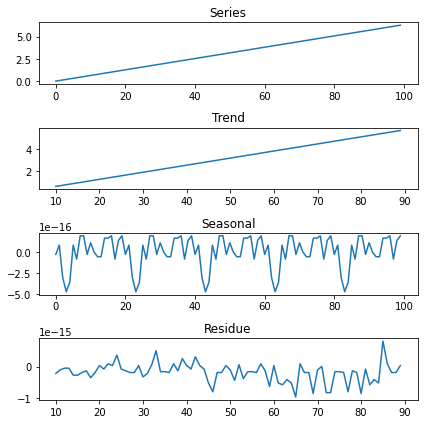

In [ ]:
# série: tendência linear
series = generate_series(x, f, opt='linear_trend')
decomposition = seasonal_decompose(series,
                                   model='additive',
                                   period = n_points_in_period)
plot_decomposition(decomposition)

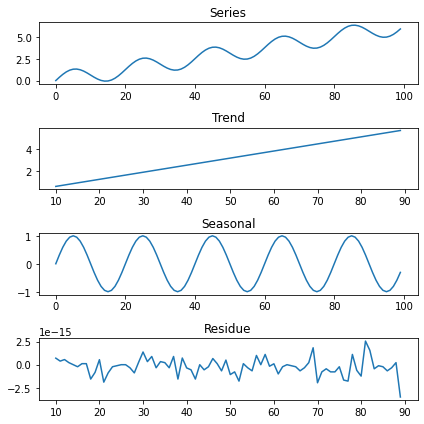

In [ ]:
# série: tedência linear + sazonalidade
series = generate_series(x, f, opt='linear_trend+seasonal')
decomposition = seasonal_decompose(series,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)

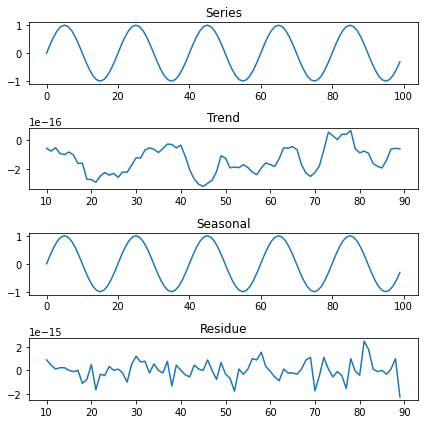

In [ ]:
# série: sazonalidade
series = generate_series(x, f, opt='seasonal')
decomposition = seasonal_decompose(series,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)

### ACF e PACF

In [ ]:
# leitura dos dados
df = pd.read_csv("https://pycourse.s3.amazonaws.com/monthly_air_passengers.csv",
                 index_col='Month')
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


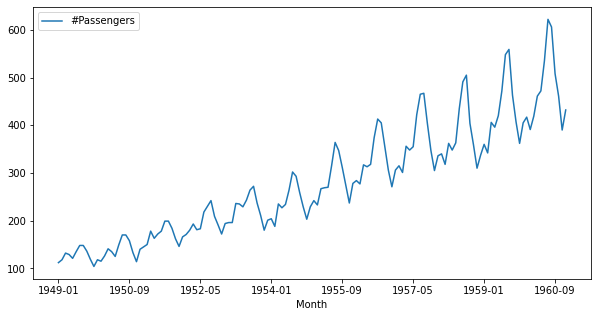

In [ ]:
# plot
df.plot(figsize=(10, 5));

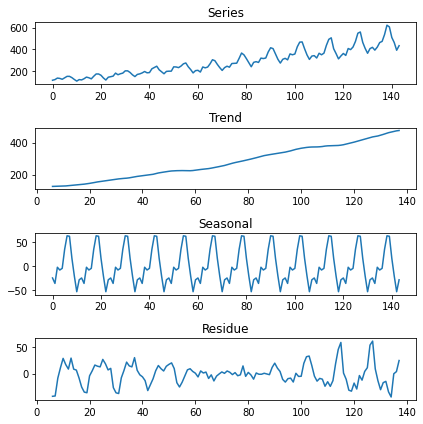

In [ ]:
# decomposição
decomposition = seasonal_decompose(df.values,
                                   model='additive',
                                   period=12)
plot_decomposition(decomposition)

In [ ]:
# verificação de estacionariedade
result = adfuller(df)
print(f'p-value: {result[1]}')

p-value: 0.9918802434376409


In [ ]:
# diferenciando a série
df_diff = df.diff().dropna()

In [ ]:
# teste da série diferenciada
result = adfuller(df_diff.dropna())
print(f'p-value: {result[1]}')

p-value: 0.05421329028382577


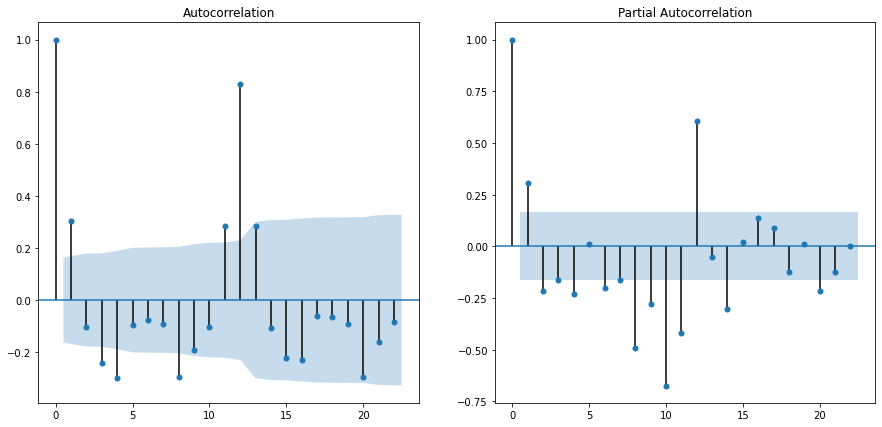

In [ ]:
# visualização da ACF e PACF
fig, ax = plt.subplots(ncols=2, figsize=(15, 7))
plot_acf(df_diff, ax=ax[0])
plot_pacf(df_diff, ax=ax[1])
plt.show()

## **Seleção de parâmetros em modelos ARIMA**

In [ ]:
# se necessário, descomentar e executar
# !pip install pmdarima

     |████████████████████████████████| 1.5MB 31.1MB/s 


In [ ]:
import pmdarima as pm

In [ ]:
# divisão em treino e teste sequencial 
n, p = len(df), 0.7
train = df[:int(n*p)]
test = df[int(n*p):]

In [ ]:
# treinando o modelo
model = pm.auto_arima(train,
                      seasonal=True,
                      m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# relatório
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.761, Time=0.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.30 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.26 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.08 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.12 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.30 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [ ]:
# predição
forecast = model.predict(n_periods=len(test))

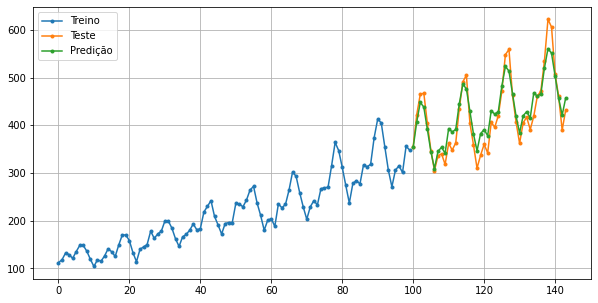

In [ ]:
# plot da predição
plt.figure(figsize=(10, 5))
plt.plot(np.arange(int(n*p)), train.values,'.-', label='Treino')
plt.plot(np.arange(int(n*p), n), test.values,'.-', label='Teste')
plt.plot(np.arange(int(n*p), n), forecast,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test,forecast))
print(f"RMSE do modelo no conjunto de teste: {rmse}")

RMSE do modelo no conjunto de teste: 26.205870245693415


em media nosso modelo está errando 26.205 passageiros

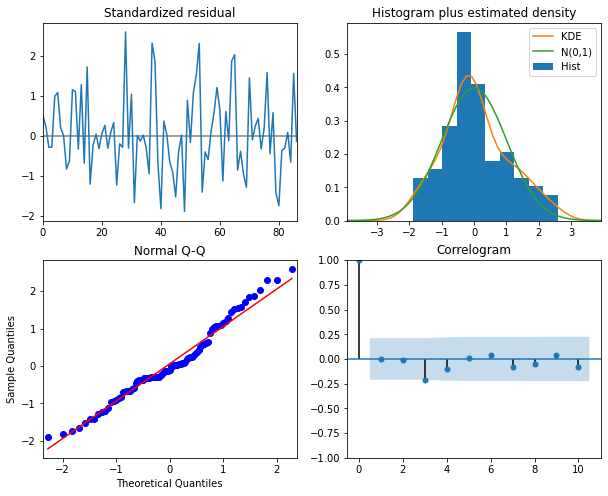

In [ ]:
# plot de diagnóstico
model.plot_diagnostics(figsize=(10, 8));

## **Predição utilizando Redes Neurais Recorrentes**

In [ ]:
# utilizando o keras: https://keras.io/
import keras
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# extraindo a série (np.array)
series = df.values 

In [ ]:
# normalização (max 1 e min 0)
scaler = MinMaxScaler()
series = scaler.fit_transform(series)

In [ ]:
# divisão em treino e teste
n, p = len(df), 0.7
train = series[:int(n*p)]
test = series[int(n*p):]

In [ ]:
# convertendo a série para uma estrutura x_train, y_train
x_train, y_train = train[:-1], train[1:]
x_test, y_test = test[:-1], test[1:]

In [ ]:
# x_train, y_train: primeiras 5 linhas
print(np.c_[x_train, y_train][:5, :])

[[0.01544402 0.02702703]
 [0.02702703 0.05405405]
 [0.05405405 0.04826255]
 [0.04826255 0.03281853]
 [0.03281853 0.05984556]]


In [ ]:
# construindo modelo
inputs = keras.layers.Input(shape=(1, 1))
lstm_out = keras.layers.LSTM(4)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


![link text](https://cdn-images-1.medium.com/freeze/max/1000/1*An4tZEyQAYgPAZl396JzWg.png?q=20)

In [ ]:
# fit no modelo
model.fit(x=x_train, y=y_train, batch_size=1, epochs=25)

Epoch 1/25
99/99 [==============================] - 16s 1ms/step - loss: 0.0406
Epoch 2/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0171
Epoch 3/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 4/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 5/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 6/25
99/99 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 7/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 8/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 9/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 10/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0033
Epoch 11/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 12/25
99/99 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 13/25
99/99 [=============================

In [ ]:
# previsão
forecast = model.predict(x_test)

In [ ]:
# valores na escala original
forecast_orig = scaler.inverse_transform(forecast)
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)

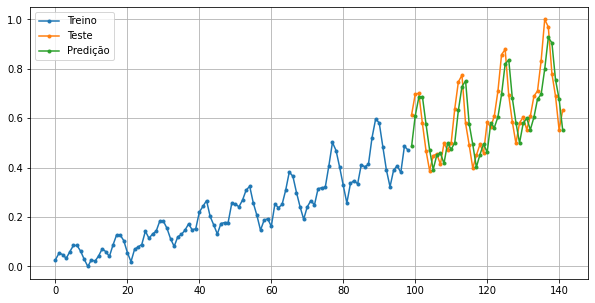

In [ ]:
# plot da predição
n_train, n_test = len(y_train), len(y_test)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_train), y_train_orig,'.-', label='Treino')
plt.plot(np.arange(n_train, n_train+n_test), y_test_orig,'.-', label='Teste')
plt.plot(np.arange(n_train, n_train+n_test), forecast_orig,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig,forecast_orig))
print(f"RMSE do modelo no conjunto de teste: {rmse}")

RMSE do modelo no conjunto de teste: 0.09295953269806302


In [ ]:
# adição da sazonalidade como variável exógena
# [s_{t-12}, s_{t-1}] ~ s_t
sz = 12
x_train, y_train = np.c_[train[:-sz], train[sz-1:-1]], train[sz:]
x_test, y_test = np.c_[test[:-sz], test[sz-1:-1]], test

In [ ]:
# contabilização do primeiro ciclo de teste na predição
x_test = np.r_[np.c_[train[-sz:],
                     np.r_[train[-1], test[:sz-1].ravel()]], x_test]

In [ ]:
# construindo modelo
inputs = keras.layers.Input(shape=(2, 1))
lstm_out = keras.layers.LSTM(4)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2, 1)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit no modelo
model.fit(x=x_train, y=y_train, batch_size=1, epochs=25)

Epoch 1/25
88/88 [==============================] - 2s 1ms/step - loss: 0.0574
Epoch 2/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0195
Epoch 3/25
88/88 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 4/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 5/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 6/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 7/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 8/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 9/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 11/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/25
88/88 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/25
88/88 [==============================

In [ ]:
# previsão
forecast = model.predict(x_test)

In [ ]:
# valores na escala original
forecast_orig = scaler.inverse_transform(forecast)
y_train_orig = scaler.inverse_transform(y_train)
y_test_orig = scaler.inverse_transform(y_test)

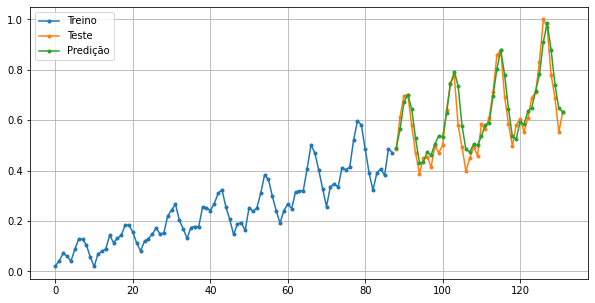

In [ ]:
# plot da predição
n_train, n_test = len(y_train), len(y_test)
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_train), y_train_orig,'.-', label='Treino')
plt.plot(np.arange(n_train, n_train+n_test), y_test_orig,'.-', label='Teste')
plt.plot(np.arange(n_train, n_train+n_test), forecast_orig,'.-', label='Predição')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig,forecast_orig))
print(f"RMSE do modelo no conjunto de teste: {rmse}")

RMSE do modelo no conjunto de teste: 0.052291214118725504
